In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('3b movies_GloVe.csv')
country_codes = pd.read_csv('country_codes.csv')

In [3]:
def get_numbers(str):
    """Return the integer numbers from a string in an array format."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').split()
    arr = [int(s) for s in arr if s.isdigit()]
    return arr

def get_country_codes(str):
    """Return the codes of the countries from a string."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').replace("'", "").split()
    arr = [s for s in arr if country_codes['Code'].str.contains(s).any()]
    return arr

def prepare_dataframe(movies):
    
    movies = movies.drop(['id', 'title'], axis=1)
    
    # Categorical values are not used, because of the algorithm
    numeric = movies.drop(['adult', 'genres', 'original_language', 'production_companies', 'production_countries'], axis=1)
    
    # Scale the numeric values to (0, 1) interval
    scaler = MinMaxScaler()
    numeric = scaler.fit_transform(numeric)
    
    movievectors = pd.DataFrame(numeric)
    
    return movievectors

In [4]:
movies = prepare_dataframe(movies)

Calculate the cluster sizes and distances from cluster centroids:

In [5]:
kmeans = KMeans(n_clusters=35, random_state=98)
kmeans.fit(movies)

KMeans(n_clusters=35, random_state=98)

In [6]:
unique, counts = np.unique(kmeans.predict(movies), return_counts=True)

Text(0, 0.5, 'Number of elements in each cluster')

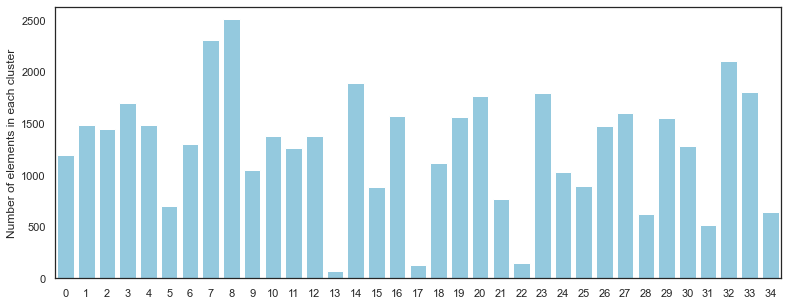

In [7]:
df1 = pd.DataFrame(data=counts, columns=['Size'])
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

p = sns.barplot(x = df1.index, y='Size', data=df1, color='skyblue')
p.set_ylabel('Number of elements in each cluster')

In [8]:
# Distribution of distances from cluster center in cluster for specified cluster
c = 0 # Cluster index
distances_in = np.zeros(movies[kmeans.labels_ == c].shape[0])
i = 0
for index, movie in movies[kmeans.labels_ == c].iterrows():
    distances_in[i] = np.linalg.norm(kmeans.cluster_centers_[c] - movie) # Euclidean distance
    i = i + 1

Text(0, 0.5, '')

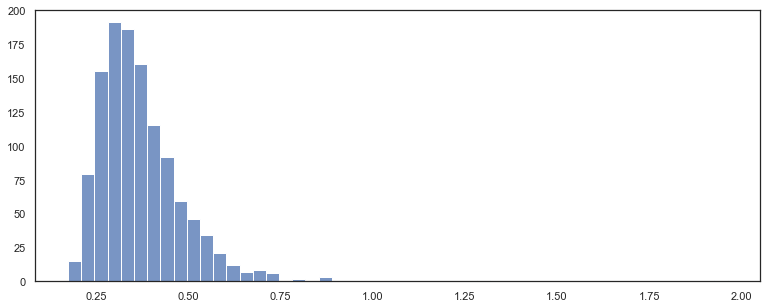

In [9]:
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

p = sns.histplot(distances_in, bins=50)
p.set_ylabel('')

In [10]:
# Distribution of distances from cluster center for all data
c = 0 # Cluster index
distances_out = np.zeros(movies.shape[0])
i = 0
for index, movie in movies.iterrows():
    distances_out[i] = np.linalg.norm(kmeans.cluster_centers_[c] - movie) # Euclidean distance
    i = i + 1

Text(0, 0.5, '')

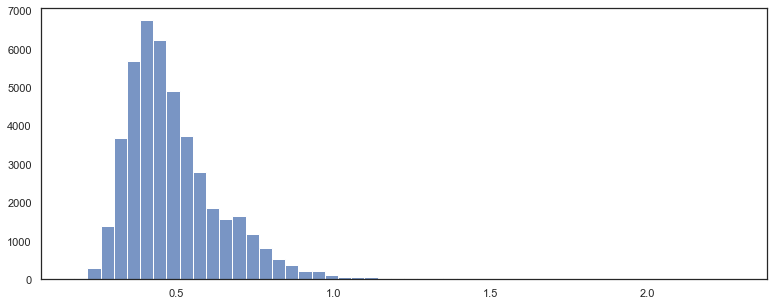

In [11]:
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

p = sns.histplot(distances_out, bins=50)
p.set_ylabel('')

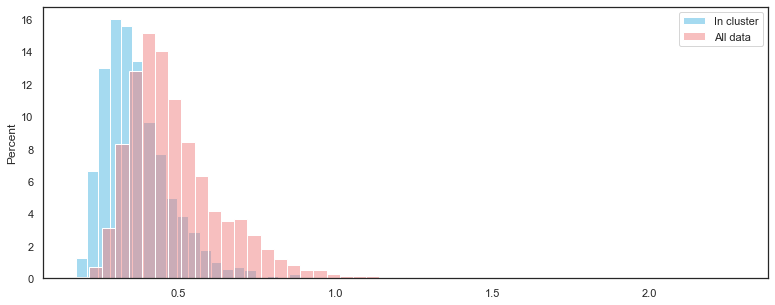

In [45]:
# The previous two plots combined
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

sns.histplot(distances_in, stat='percent', bins=50, label='In cluster', color='skyblue')
sns.histplot(distances_out, stat='percent', bins=50, label='All data', color='lightcoral', alpha=0.5)
plt.legend()